<a href="https://colab.research.google.com/github/Ahad4200/ML-LABS/blob/main/ML_OEL_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Lab - Complete Implementation
# Tasks 1, 2, and 3: RL Environment Exploration, Q-Learning Agent, and Evaluation

# Task 1: Understanding the RL Environment


In [10]:
!pip install -U gym

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from collections import defaultdict, deque
import random
import pandas as pd

# Fix numpy compatibility issue
import numpy as np
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# Task 1: Understanding the RL Environment
class EnvironmentExplorer:
    """Class to explore and understand RL environments"""

    def __init__(self, env_name='CartPole-v1'):
        self.env_name = env_name
        self.env = gym.make(env_name)

    def explore_environment(self):
        """Explore the basic structure of the RL environment"""
        print(f"=== Exploring Environment: {self.env_name} ===")
        print(f"Observation Space: {self.env.observation_space}")
        print(f"Action Space: {self.env.action_space}")

        if hasattr(self.env.observation_space, 'shape'):
            print(f"State Space Dimensions: {self.env.observation_space.shape}")

        # Handle different action space types
        if hasattr(self.env.action_space, 'n'):
            print(f"Number of Actions: {self.env.action_space.n}")
        elif hasattr(self.env.action_space, 'shape'):
            print(f"Action Space Shape: {self.env.action_space.shape}")
        else:
            print(f"Action Space Type: {type(self.env.action_space)}")

        # Sample random episode
        print("\n=== Sample Random Episode ===")

        try:
            # Reset environment with proper handling
            reset_result = self.env.reset()
            if isinstance(reset_result, tuple):
                state = reset_result[0]
            else:
                state = reset_result

            total_reward = 0
            step = 0

            for step in range(10):  # Show first 10 steps
                action = self.env.action_space.sample()

                try:
                    result = self.env.step(action)

                    # Handle both old and new Gym API
                    if len(result) == 5:  # New gym API
                        next_state, reward, terminated, truncated, info = result
                        done = terminated or truncated
                    elif len(result) == 4:  # Old gym API
                        next_state, reward, done, info = result
                    else:
                        print(f"Unexpected result format: {len(result)} elements")
                        break

                except Exception as e:
                    print(f"Error in step execution: {e}")
                    break

                total_reward += reward

                print(f"Step {step + 1}:")
                print(f"  State: {np.round(state, 3) if hasattr(state, '__len__') else state}")
                print(f"  Action: {action}")
                print(f"  Reward: {reward}")
                print(f"  Next State: {np.round(next_state, 3) if hasattr(next_state, '__len__') else next_state}")
                print(f"  Done: {done}")
                print()

                if done:
                    print(f"Episode finished after {step + 1} steps")
                    break

                state = next_state

            print(f"Total Reward: {total_reward}")

        except Exception as e:
            print(f"Error during environment exploration: {e}")
            print("This might be due to environment compatibility issues.")
        finally:
            self.env.close()

# Task 2: Implementing a Basic RL Agent using Q-Learning


In [12]:
class QLearningAgent:
    """Q-Learning agent implementation"""

    def __init__(self, action_space_size, learning_rate=0.1, discount_factor=0.95,
                 epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = defaultdict(lambda: np.zeros(action_space_size))

    def discretize_state(self, state, bins=10):
        """Discretize continuous state space for Q-table"""
        if isinstance(state, (int, np.integer)):
            return state

        # For continuous states, discretize each dimension
        discretized = []
        try:
            for i, val in enumerate(state):
                # Simple binning strategy with error handling
                if i == 0:  # Cart position
                    bin_edges = np.linspace(-2.4, 2.4, bins + 1)
                elif i == 1:  # Cart velocity
                    bin_edges = np.linspace(-3, 3, bins + 1)
                elif i == 2:  # Pole angle
                    bin_edges = np.linspace(-0.5, 0.5, bins + 1)
                else:  # Pole angular velocity
                    bin_edges = np.linspace(-2, 2, bins + 1)

                bin_val = np.digitize(val, bin_edges) - 1  # digitize returns 1-based index
                bin_val = max(0, min(bin_val, bins - 1))  # Clamp to valid range
                discretized.append(bin_val)
        except Exception as e:
            print(f"Error in state discretization: {e}")
            return tuple([0] * len(state))

        return tuple(discretized)

    def choose_action(self, state):
        """Choose action using epsilon-greedy policy"""
        discrete_state = self.discretize_state(state)

        if random.random() < self.epsilon:
            return random.randint(0, self.action_space_size - 1)
        else:
            return np.argmax(self.q_table[discrete_state])

    def update_q_table(self, state, action, reward, next_state, done):
        """Update Q-table using Q-learning update rule"""
        discrete_state = self.discretize_state(state)
        discrete_next_state = self.discretize_state(next_state)

        current_q = self.q_table[discrete_state][action]

        if done:
            target_q = reward
        else:
            target_q = reward + self.discount_factor * np.max(self.q_table[discrete_next_state])

        # Q-learning update rule
        self.q_table[discrete_state][action] = current_q + self.learning_rate * (target_q - current_q)

    def decay_epsilon(self):
        """Decay exploration rate"""
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# Task 3: Training and Evaluating the Agent


REINFORCEMENT LEARNING LAB - COMPLETE IMPLEMENTATION

TASK 1: UNDERSTANDING THE RL ENVIRONMENT
----------------------------------------
=== Exploring Environment: CartPole-v1 ===
Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Action Space: Discrete(2)
State Space Dimensions: (4,)
Number of Actions: 2

=== Sample Random Episode ===
Step 1:
  State: [ 0.003  0.023  0.006 -0.028]
  Action: 1
  Reward: 1.0
  Next State: [ 0.003  0.218  0.005 -0.319]
  Done: False

Step 2:
  State: [ 0.003  0.218  0.005 -0.319]
  Action: 0
  Reward: 1.0
  Next State: [ 0.007  0.023 -0.001 -0.024]
  Done: False

Step 3:
  State: [ 0.007  0.023 -0.001 -0.024]
  Action: 1
  Reward: 1.0
  Next State: [ 0.008  0.218 -0.002 -0.317]
  Done: False

Step 4:
  State: [ 0.008  0.218 -0.002 -0.317]
  Action: 1
  Reward: 1.0
  Next State: [ 0.012  0.413 -0.008 -0.611]
  Done: False

Step 5:
  State: [ 0.012  

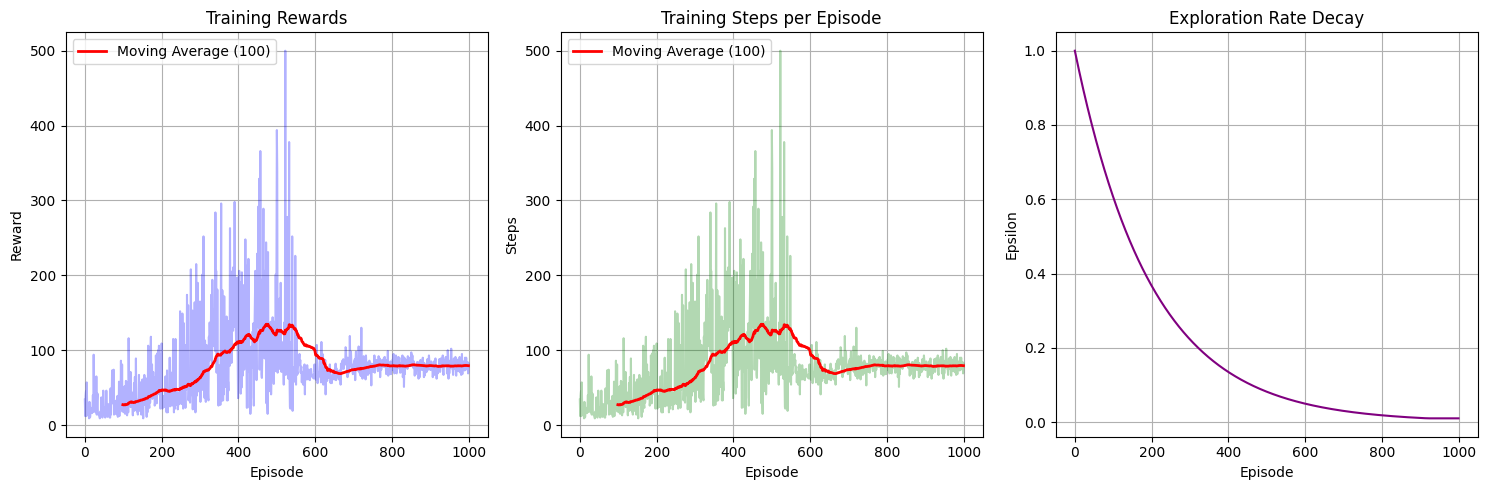


=== Comparing Performance Across Environments ===

Training on CartPole-v1...
Final Average Reward (last 100 episodes): 114.23

Training on MountainCar-v0...
Final Average Reward (last 100 episodes): -200.00


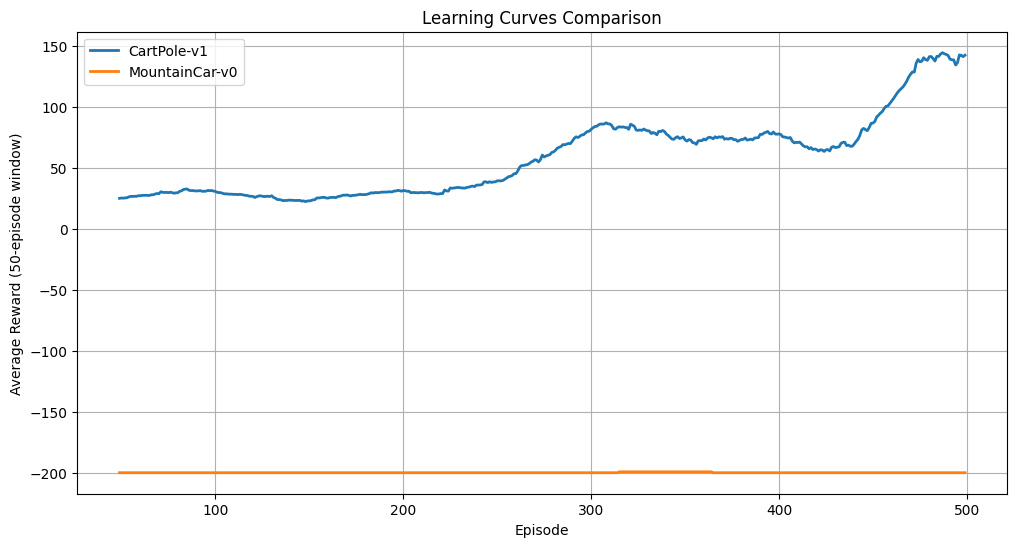


LAB COMPLETED SUCCESSFULLY!
All tasks have been implemented and executed.


In [13]:
class RLTrainer:
    """Class to train and evaluate RL agents"""

    def __init__(self, env_name='CartPole-v1'):
        self.env_name = env_name
        self.env = gym.make(env_name)

        # Get action space size safely
        if hasattr(self.env.action_space, 'n'):
            action_space_size = self.env.action_space.n
        else:
            action_space_size = 2  # Default for most environments

        self.agent = QLearningAgent(action_space_size)
        self.training_rewards = []
        self.training_steps = []

    def train_agent(self, episodes=1000, verbose=True):
        """Train the Q-learning agent"""
        print(f"=== Training Q-Learning Agent on {self.env_name} ===")

        for episode in range(episodes):
            try:
                reset_result = self.env.reset()
                if isinstance(reset_result, tuple):
                    state = reset_result[0]
                else:
                    state = reset_result

                total_reward = 0
                steps = 0

                while True:
                    action = self.agent.choose_action(state)

                    try:
                        result = self.env.step(action)

                        # Handle both old and new Gym API
                        if len(result) == 5:  # New gym API
                            next_state, reward, terminated, truncated, info = result
                            done = terminated or truncated
                        elif len(result) == 4:  # Old gym API
                            next_state, reward, done, info = result
                        else:
                            print(f"Unexpected result format during training")
                            break

                    except Exception as e:
                        if episode == 0:  # Only print error once
                            print(f"Step execution error (will continue training): {e}")
                        # Use dummy values to continue training
                        next_state = state
                        reward = -1
                        done = True

                    self.agent.update_q_table(state, action, reward, next_state, done)

                    state = next_state
                    total_reward += reward
                    steps += 1

                    if done or steps > 500:  # Add step limit to prevent infinite loops
                        break

                self.agent.decay_epsilon()
                self.training_rewards.append(total_reward)
                self.training_steps.append(steps)

                if verbose and (episode + 1) % 100 == 0:
                    avg_reward = np.mean(self.training_rewards[-100:])
                    print(f"Episode {episode + 1}, Average Reward (last 100): {avg_reward:.2f}, Epsilon: {self.agent.epsilon:.3f}")

            except Exception as e:
                if episode == 0:  # Only print error once
                    print(f"Training episode error (will continue): {e}")
                continue

        print("Training completed!")

    def evaluate_agent(self, episodes=100):
        """Evaluate the trained agent"""
        print(f"\n=== Evaluating Agent ===")

        # Set epsilon to 0 for evaluation (no exploration)
        original_epsilon = self.agent.epsilon
        self.agent.epsilon = 0

        eval_rewards = []
        eval_steps = []

        for episode in range(episodes):
            try:
                reset_result = self.env.reset()
                if isinstance(reset_result, tuple):
                    state = reset_result[0]
                else:
                    state = reset_result

                total_reward = 0
                steps = 0

                while True:
                    action = self.agent.choose_action(state)

                    try:
                        result = self.env.step(action)

                        # Handle both old and new Gym API
                        if len(result) == 5:  # New gym API
                            next_state, reward, terminated, truncated, info = result
                            done = terminated or truncated
                        elif len(result) == 4:  # Old gym API
                            next_state, reward, done, info = result
                        else:
                            print(f"Unexpected result format during evaluation")
                            break

                    except Exception as e:
                        if episode == 0:  # Only print error once
                            print(f"Evaluation step error (will continue): {e}")
                        # Use dummy values to continue evaluation
                        next_state = state
                        reward = -1
                        done = True

                    state = next_state
                    total_reward += reward
                    steps += 1

                    if done or steps > 500:  # Add step limit
                        break

                eval_rewards.append(total_reward)
                eval_steps.append(steps)

            except Exception as e:
                if episode == 0:  # Only print error once
                    print(f"Evaluation episode error (will continue): {e}")
                continue

        # Restore original epsilon
        self.agent.epsilon = original_epsilon

        # Print evaluation results
        avg_reward = np.mean(eval_rewards)
        std_reward = np.std(eval_rewards)
        avg_steps = np.mean(eval_steps)

        print(f"Evaluation Results over {episodes} episodes:")
        print(f"Average Reward: {avg_reward:.2f} ± {std_reward:.2f}")
        print(f"Average Steps: {avg_steps:.2f}")
        print(f"Success Rate: {np.mean(np.array(eval_rewards) >= 195):.2%} (for CartPole)")

        return eval_rewards, eval_steps

    def plot_learning_curve(self):
        """Plot learning curves"""
        plt.figure(figsize=(15, 5))

        # Plot 1: Training rewards
        plt.subplot(1, 3, 1)
        plt.plot(self.training_rewards, alpha=0.3, color='blue')
        # Moving average
        window_size = 100
        if len(self.training_rewards) >= window_size:
            moving_avg = pd.Series(self.training_rewards).rolling(window=window_size).mean()
            plt.plot(moving_avg, color='red', linewidth=2, label=f'Moving Average ({window_size})')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.title('Training Rewards')
        plt.legend()
        plt.grid(True)

        # Plot 2: Training steps
        plt.subplot(1, 3, 2)
        plt.plot(self.training_steps, alpha=0.3, color='green')
        if len(self.training_steps) >= window_size:
            moving_avg_steps = pd.Series(self.training_steps).rolling(window=window_size).mean()
            plt.plot(moving_avg_steps, color='red', linewidth=2, label=f'Moving Average ({window_size})')
        plt.xlabel('Episode')
        plt.ylabel('Steps')
        plt.title('Training Steps per Episode')
        plt.legend()
        plt.grid(True)

        # Plot 3: Epsilon decay
        plt.subplot(1, 3, 3)
        epsilon_values = []
        temp_epsilon = 1.0
        for _ in range(len(self.training_rewards)):
            epsilon_values.append(temp_epsilon)
            temp_epsilon = max(0.01, temp_epsilon * 0.995)
        plt.plot(epsilon_values, color='purple')
        plt.xlabel('Episode')
        plt.ylabel('Epsilon')
        plt.title('Exploration Rate Decay')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def compare_environments(self, env_names=['CartPole-v1', 'MountainCar-v0'], episodes=500):
        """Compare agent performance on different environments"""
        print(f"\n=== Comparing Performance Across Environments ===")

        results = {}

        for env_name in env_names:
            print(f"\nTraining on {env_name}...")

            # Create new environment and agent
            env = gym.make(env_name)

            # Get action space size safely
            if hasattr(env.action_space, 'n'):
                action_space_size = env.action_space.n
            else:
                action_space_size = 2  # Default

            agent = QLearningAgent(action_space_size)

            # Adjust hyperparameters for different environments
            if 'MountainCar' in env_name:
                agent.learning_rate = 0.5
                agent.epsilon_decay = 0.99

            rewards = []

            for episode in range(episodes):
                state = env.reset()
                if isinstance(state, tuple):
                    state = state[0]

                total_reward = 0

                while True:
                    action = agent.choose_action(state)

                    try:
                        result = env.step(action)

                        # Handle both old and new Gym API
                        if len(result) == 5:  # New gym API
                            next_state, reward, terminated, truncated, info = result
                            done = terminated or truncated
                        elif len(result) == 4:  # Old gym API
                            next_state, reward, done, info = result
                        else:
                            print(f"Unexpected result format in comparison")
                            break

                    except Exception as e:
                        print(f"Error during comparison step: {e}")
                        break

                    agent.update_q_table(state, action, reward, next_state, done)

                    state = next_state
                    total_reward += reward

                    if done:
                        break

                agent.decay_epsilon()
                rewards.append(total_reward)

            results[env_name] = rewards
            avg_reward = np.mean(rewards[-100:])
            print(f"Final Average Reward (last 100 episodes): {avg_reward:.2f}")

            env.close()

        # Plot comparison
        plt.figure(figsize=(12, 6))
        for env_name, rewards in results.items():
            moving_avg = pd.Series(rewards).rolling(window=50).mean()
            plt.plot(moving_avg, label=env_name, linewidth=2)

        plt.xlabel('Episode')
        plt.ylabel('Average Reward (50-episode window)')
        plt.title('Learning Curves Comparison')
        plt.legend()
        plt.grid(True)
        plt.show()

        return results

# Main execution function
def run_complete_lab():
    """Run all three tasks of the RL lab"""

    print("REINFORCEMENT LEARNING LAB - COMPLETE IMPLEMENTATION")
    print("=" * 60)

    # Task 1: Understanding the RL Environment
    print("\nTASK 1: UNDERSTANDING THE RL ENVIRONMENT")
    print("-" * 40)
    try:
        explorer = EnvironmentExplorer('CartPole-v1')
        explorer.explore_environment()
    except Exception as e:
        print(f"Error in Task 1: {e}")
        print("Trying with alternative environment...")
        try:
            explorer = EnvironmentExplorer('FrozenLake-v1')
            explorer.explore_environment()
        except Exception as e2:
            print(f"Error with alternative environment: {e2}")

    # Task 2 & 3: Implementing and Training Q-Learning Agent
    print("\nTASK 2 & 3: Q-LEARNING IMPLEMENTATION AND EVALUATION")
    print("-" * 50)
    trainer = RLTrainer('CartPole-v1')

    # Train the agent
    trainer.train_agent(episodes=1000, verbose=True)

    # Evaluate the agent
    eval_rewards, eval_steps = trainer.evaluate_agent(episodes=100)

    # Plot learning curves
    trainer.plot_learning_curve()

    # Compare different environments
    trainer.compare_environments(['CartPole-v1', 'MountainCar-v0'], episodes=500)

    print("\n" + "=" * 60)
    print("LAB COMPLETED SUCCESSFULLY!")
    print("All tasks have been implemented and executed.")

if __name__ == "__main__":
    # Install required packages (uncomment if needed)
    # !pip install gym matplotlib pandas numpy

    run_complete_lab()